<a href="https://colab.research.google.com/github/victor-ferreira/Data-Science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Science, como iniciar?**
*by [Victor Ferreira](https://www.linkedin.com/in/vasf1/i)*

---

# Análise dos Dados do Airbnb - *Santiago - Chile*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Santiago no Chile, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Santiago (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/chile/rm/santiago/2021-09-28/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://www.dropbox.com/s/rwdrwi94jfoldvg/listings.csv?dl=1) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.


In [1]:
!pip install folium

In [2]:
# importar os pacotes necessarios
import folium
import pandas as pd 
from folium import plugins
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importar o arquivo listings.csv para um DataFrame
#por alguma razão é necessário colocar o dl=1

df = pd.read_csv("https://www.dropbox.com/s/rwdrwi94jfoldvg/listings.csv?dl=1")

## Análise dos Dados

Esta etapa tem por objetivo apresentar uma visão situacional inicial, além de permitir um maior entendimento de como os dados estão apresentados/estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,30950,"Apartment Providencia, Santiago",132845,Pamela,NaN,Providencia,-33.43174,-70.61845,Entire home/apt,260000,180,12,2021-02-22,0.56,1,188,6,NaN
1,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,42256,3,0,NaN,NaN,2,178,0,NaN
2,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,43053,1,45,2019-04-22,0.44,3,332,0,NaN
3,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2017-06-10,0.60,1,363,1,NaN
4,53917,Estudio un ambiente Metro Bellas Artes,252213,Patricia,NaN,Santiago,-33.43524,-70.64544,Entire home/apt,27782,60,8,2019-05-11,0.23,1,89,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 9383 entradas e 74 variáveis (`listings.csv.gz`).

In [5]:
# identificar o volume de dados do DataFrame
print("O número de Entradas eh: ",df.shape[0])
print("O número de Variáveis eh: ",df.shape[1], "\n")

#verificando o tipo das entradas
df.dtypes #aqui pode ser visualizado da seguinte maneira display(df.dtypes)

O número de Entradas eh:  9383
O número de Variáveis eh:  18 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Para isso vamos identificar os valores reais e sua respectiva porcentagem em relação ao dataset

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* A variável  `license` possuí quase 100% dos seus valores faltantes
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [6]:
# verificando dados ausentes
total = (df.isnull().sum()).sort_values(ascending=False)
print(total)
print("\n","##########################################", "\n")

# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               9383
license                           9275
reviews_per_month                 3518
last_review                       3518
name                                 4
host_name                            2
longitude                            0
host_id                              0
neighbourhood                        0
latitude                             0
room_type                            0
number_of_reviews_ltm                0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
id                                   0
dtype: int64

 ########################################## 



neighbourhood_group               1.000000
license                           0.988490
reviews_per_month                 0.374933
last_review                       0.374933
name                              0.000426
host_name                         0.000213
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar o tipo de distribuição das variáveis, um histograma é plotado facilitando a visualização dos dados.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb72346ab10>,
      dtype=object)

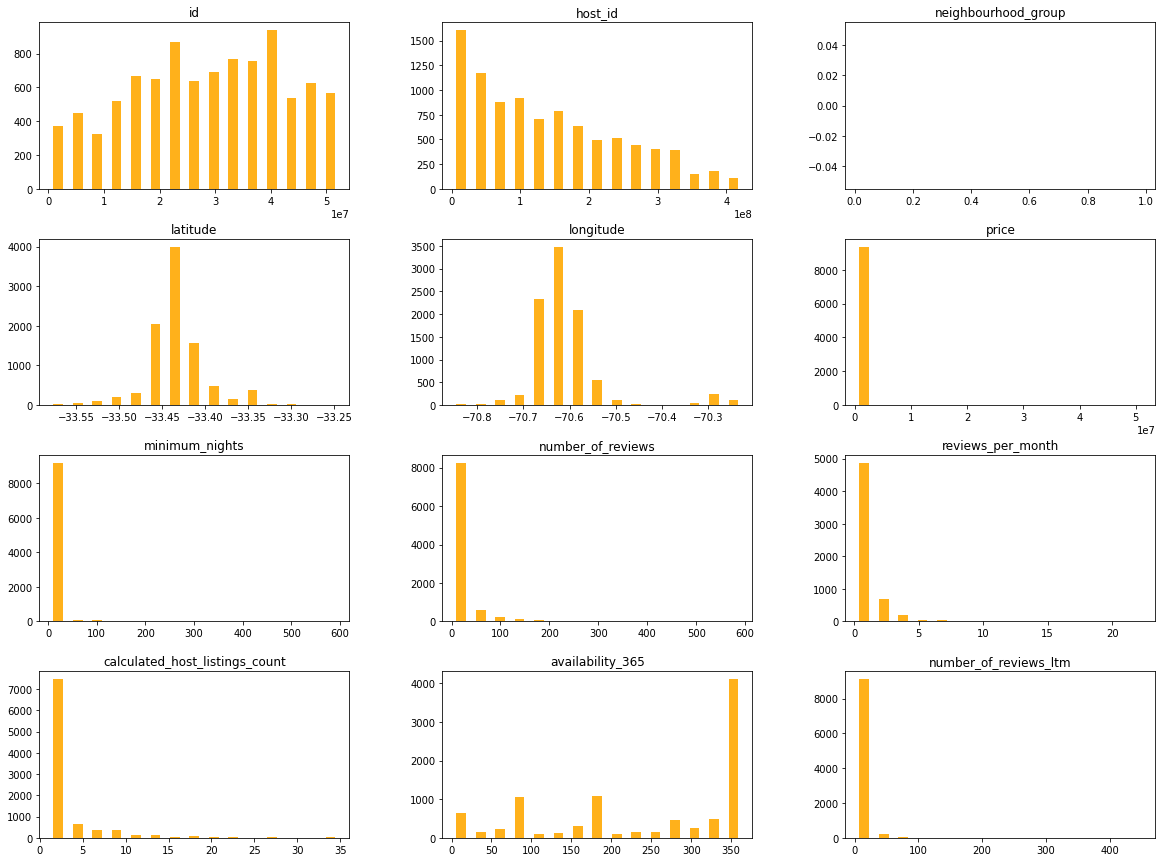

In [7]:
# plotar o histograma
df.hist(bins=15, grid=False, figsize=(20,15), color='#ffb11b', zorder=2, rwidth=0.5)

### **Q4. Qual a correlação existente entre as variáveis**

In [8]:
# criar uma matriz de correlação
corr = df.corr()

# mostrar a matriz de correlação
display(corr)

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.618496,NaN,0.006127,-0.000406,-0.016920,-0.035070,-0.200181,0.202010,0.154622,-0.084233,0.072741
host_id,0.618496,1.000000,NaN,-0.093005,-0.079599,-0.019003,-0.049205,-0.136369,0.115708,0.039953,-0.030612,0.033683
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.006127,-0.093005,NaN,1.000000,0.667818,0.030419,0.016563,0.005260,-0.038753,0.092645,-0.041762,0.011198
longitude,-0.000406,-0.079599,NaN,0.667818,1.000000,0.044801,-0.003382,-0.061475,-0.082793,0.008750,-0.036745,-0.027515
price,-0.016920,-0.019003,NaN,0.030419,0.044801,1.000000,0.007550,-0.017601,-0.022051,-0.009177,-0.002460,-0.012576
minimum_nights,-0.035070,-0.049205,NaN,0.016563,-0.003382,0.007550,1.000000,-0.012140,-0.035521,-0.046721,0.027753,-0.049838
number_of_reviews,-0.200181,-0.136369,NaN,0.005260,-0.061475,-0.017601,-0.012140,1.000000,0.678534,0.073192,-0.069669,0.614848
reviews_per_month,0.202010,0.115708,NaN,-0.038753,-0.082793,-0.022051,-0.035521,0.678534,1.000000,0.151047,-0.014708,0.739813
calculated_host_listings_count,0.154622,0.039953,NaN,0.092645,0.008750,-0.009177,-0.046721,0.073192,0.151047,1.000000,0.037002,0.141429


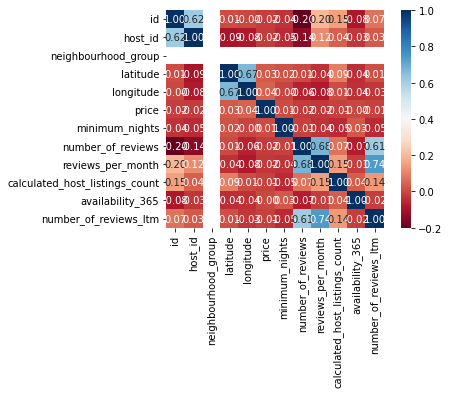

In [9]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Limpeza dos dados**

Um ponto importante a se destacar é que colunas com baixo poder preditivo e grande quantidade de dados faltantes podem ser excluídas. É o caso das variáveis: `neighbourhood_group`, `license`, `reviews_per_month` e `last_review`.

As variáveis `name` e `host_name`, estão ausentes em poucas entradas. Além disso, aparentemente possuem uma relação fraca e não aparentam ter grande poder preditivo. As demais variáveis não apresentam valores ausentes. Dessa forma, apenas a exclusão das entradas faltantes é recomendada.

In [10]:
# excluindo colunas com dados faltantes
df.drop(columns=['neighbourhood_group','license','reviews_per_month', 'last_review'], inplace=True)

# excluindo entradas com dados faltantes
df.dropna(axis=0, inplace=True)

Após o processo de limpeza, é importante verificar o dataset.

In [11]:
# verificando o resultado
(df.isnull().sum()).sort_values(ascending=False)

number_of_reviews_ltm             0
availability_365                  0
calculated_host_listings_count    0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
host_name                         0
host_id                           0
name                              0
id                                0
dtype: int64

### **Q6. Há *outliers* presentes?**

Nesta etapa iremos identificar valores discrepantes que podem comprometer o resultado final desse trabalho.

Para tratar dos outliers desse conjunto de dados, iremos analisar a distribuição estatística, plotar boxplots e calcular os limites utilizando a regra do IQR Score.

Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

# IQR = Q3 - Q1

A pricípio, é possível identificar a presença de outliers nas variáveis `minimum_nights` e `calculated_host_listings_count`  

Os valores não seguem uma distruição, e distorcem toda a representação gráfica.



In [12]:
# ver o resumo estatístico das variáveis numéricas
df.describe().round(1) #round() permite ajustar a precisão das casas decimais

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9377.0,9377.0,9377.0,9377.0,9377.0,9377.0,9377.0,9377.0,9377.0,9377.0
mean,28339220.3,139468073.3,-33.4,-70.6,77385.9,7.1,16.4,2.9,247.9,3.6
std,13861011.2,107785356.3,0.0,0.1,849888.1,27.6,37.9,4.2,126.7,12.1
min,30950.0,28488.0,-33.6,-70.9,0.0,1.0,0.0,1.0,0.0,0.0
25%,17591727.0,46100850.0,-33.4,-70.6,20000.0,1.0,0.0,1.0,147.0,0.0
50%,29188103.0,118157228.0,-33.4,-70.6,31891.0,2.0,2.0,1.0,305.0,0.0
75%,39873731.0,218081190.0,-33.4,-70.6,48153.0,3.0,14.0,3.0,364.0,2.0
max,52490335.0,424501280.0,-33.2,-70.2,51822815.0,600.0,596.0,35.0,365.0,457.0


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possuí um mínimo de 0
* A variável `price` possui 75% do valor abaixo de 48153.0, porém seu valor máximo é 51822815.0.
* A quantidade máxima de noites (`minimum_nights`) está em 600, sendo que seu Q3 está em 3 noites.


Novamente, iremos plotar o Histograma para visualizar possíveis outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb722d7efd0>,
      dtype=object)

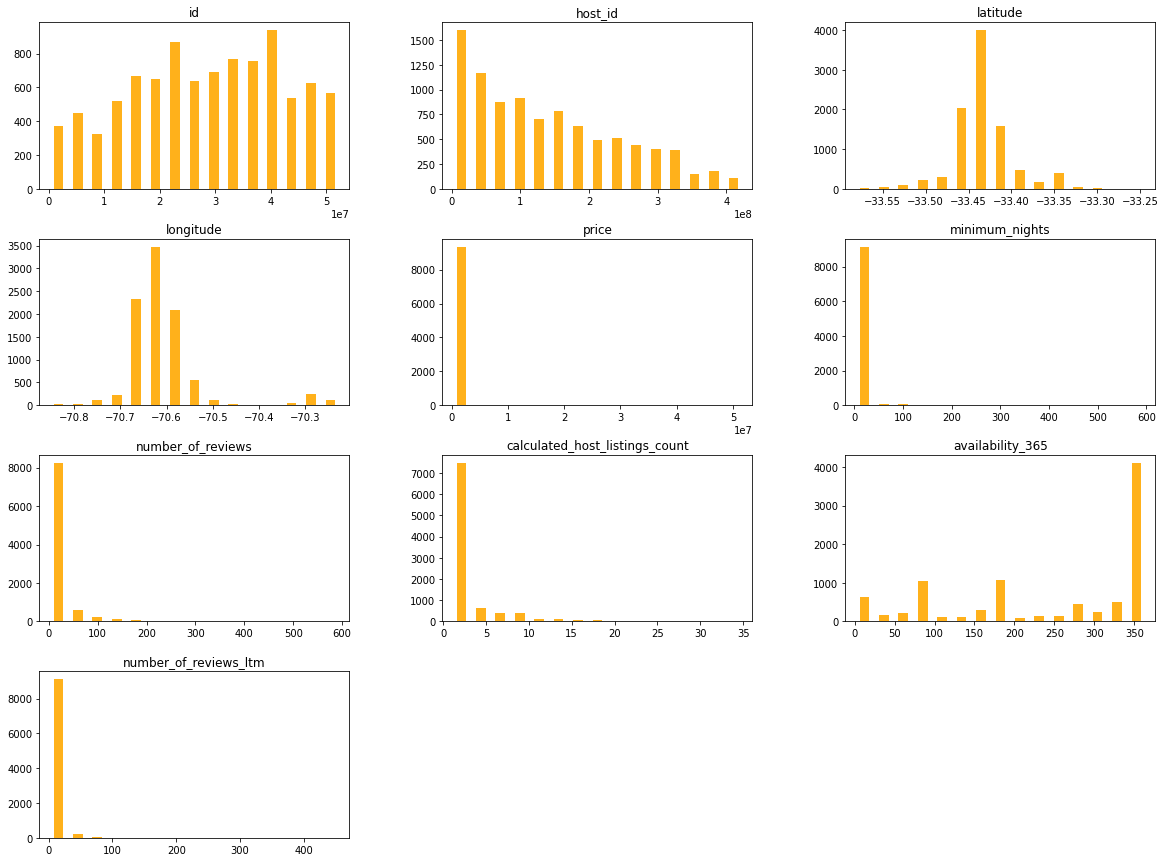

In [13]:
# verificando a distribuição das variáveis
df.hist(bins=15, grid=False, figsize=(20,15), color='#ffb11b', zorder=2, rwidth=0.5)

Verificando os histogramas, é possível identificar outliers presentes. Para tratá-los os seguintes passos serão adotados:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.


In [14]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  28153.0
Limite superior de price:  90382.5
Limite inferior de price:  -22229.5


Aqui é possível observar que, apesar de não termos outliers na parte inferior, continuamos tendo valores iguais a zero, que precisam ser tratados.

Vamos plotar um boxplot para visualizarmos a diferença feita pela limpeza.

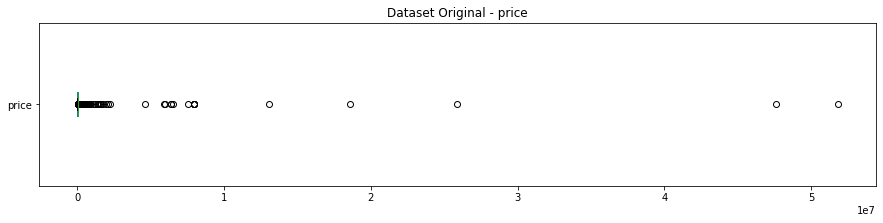

O dataset possui 9377 colunas
896 Entradas acima de 90382.5
Representam 9.56% do dataset


In [15]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 90382.5".format(len(df[df.price > 90382.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 90382.5]) / df.shape[0])*100))

Vamos agora fazer a identificação dos outliers para a variável `minimum_nights`

In [16]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  2.0
Limite superior de minimum_nights:  6.0
Limite inferior de minimum_nights:  -2.0


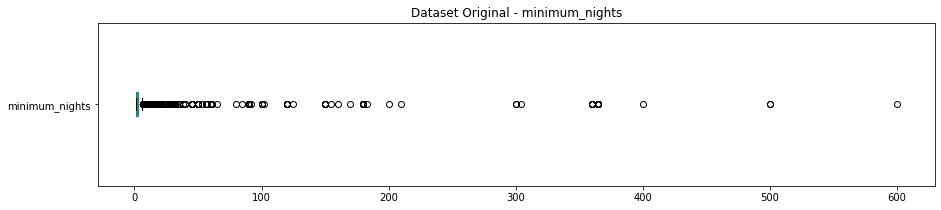

O dataset possui 9377 colunas
1353 Entradas acima de 6.0
Representam 14.43% do dataset


In [17]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 6.0".format(len(df[df.minimum_nights > 6.0])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 6.0]) / df.shape[0])*100))

Identificado os *outliers* iremos realizar a limpeza do dataset

In [18]:
# limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 90382.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)

Shape antes da limpeza:  (9377, 14)
Shape após a limpeza:  (7259, 14)


### Boxplot sem outliers

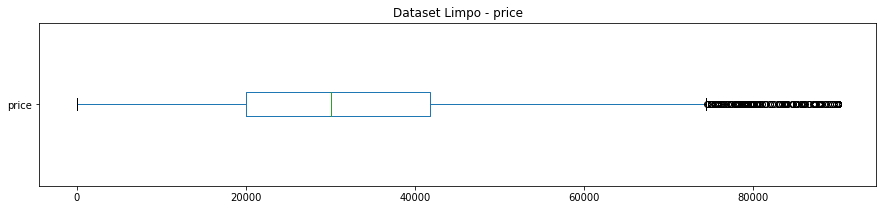

Tamanho original: 9377 colunas
Tamanho atual: 7259 colunas


In [19]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} colunas".format(df.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

É possível observarmos que há *outliers* presentes na visualização acima, contudo, vale salientar que o mesmo está sendo comparado com o dataset original (antes da limpeza).

Para garantirmos que não estamos lidando com outliers que vão prejudicar nossa análise, vamos checar os histogramas novamente. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7181c9d50>,
      dtype=object)

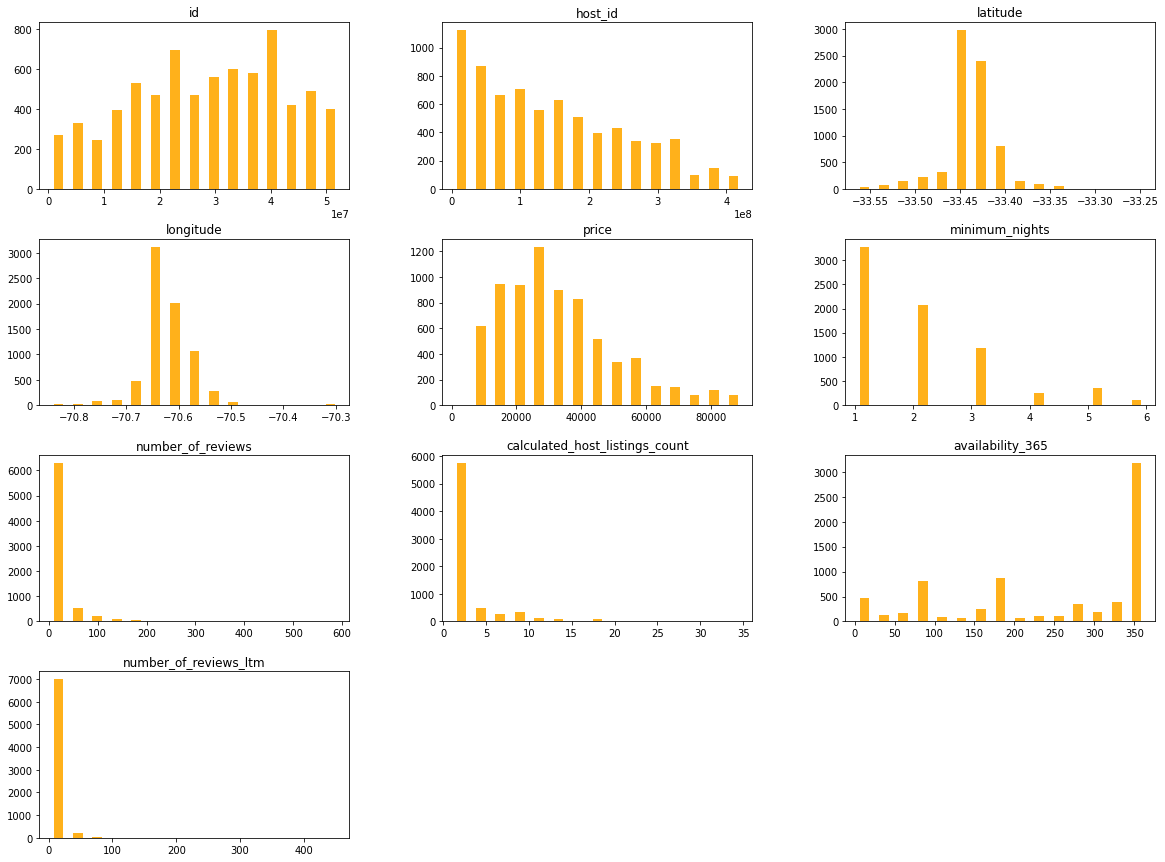

In [20]:
# verificando a distribuição das variáveis
df_clean.hist(bins=15, grid=False, figsize=(20,15), color='#ffb11b', zorder=2, rwidth=0.5)

In [21]:
# verificando a distribuição estatística dos dados limpos
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7259.0,7259.0,7259.0,7259.0,7259.0,7259.0,7259.0,7259.0,7259.0,7259.0
mean,28526149.3,144744196.5,-33.4,-70.6,33163.1,2.0,17.7,2.9,248.3,4.2
std,13677155.4,108141553.7,0.0,0.0,17504.3,1.2,39.9,4.1,126.1,13.6
min,49392.0,28488.0,-33.6,-70.8,33.0,1.0,0.0,1.0,0.0,0.0
25%,17870806.5,49832993.5,-33.4,-70.6,20000.0,1.0,0.0,1.0,151.0,0.0
50%,29632980.0,125089761.0,-33.4,-70.6,30000.0,2.0,2.0,1.0,307.0,0.0
75%,39938657.5,225413161.0,-33.4,-70.6,41778.5,3.0,16.0,3.0,364.0,2.0
max,52490335.0,424501280.0,-33.2,-70.3,90000.0,6.0,596.0,35.0,365.0,457.0


### **Q7. Qual a correlação existente entre as variáveis após a limpeza dos dados**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [24]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.060289,0.021653,0.157885,0.062414
minimum_nights,0.060289,1.000000,0.021527,-0.171617,-0.115044
number_of_reviews,0.021653,0.021527,1.000000,0.079459,-0.075351
calculated_host_listings_count,0.157885,-0.171617,0.079459,1.000000,0.109947
availability_365,0.062414,-0.115044,-0.075351,0.109947,1.000000


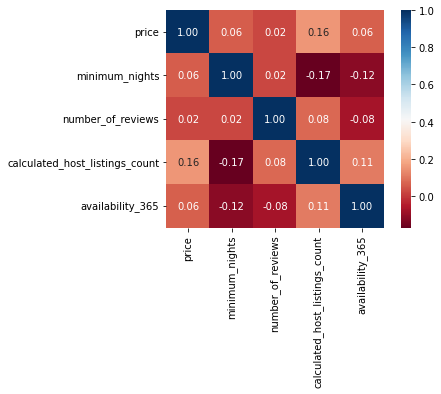

In [25]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q8. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [26]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3714
Private room       3294
Shared room         172
Hotel room           79
Name: room_type, dtype: int64

In [27]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.511641
Private room       0.453782
Shared room        0.023695
Hotel room         0.010883
Name: room_type, dtype: float64

### **Q9. Qual a localidade mais cara em Santiago (Chile)?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [28]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lo Barnechea    43339.134831
Las Condes      41425.788534
Vitacura        39958.757962
Cerro Navia     37152.000000
Providencia     36717.731741
Pudahuel        32833.255319
Huechuraba      31789.657895
Santiago        31584.601113
Recoleta        31321.077320
Renca           30880.777778
Name: price, dtype: float64

Acima, podemos observar que a limpeza dos dados foi eficaz. Os valores das diárias estão amplamente correlacionados com os bairros. Os três primeiros bairros estão interligados e compoem a parte mais nobre e mais elegante da cidade de Santiago (Chile).

### **Q10. Visualizando alugueis por bairro (Chile)?**
Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

In [29]:
 
mapa = folium.Map(location=[-33.4569400, -70.6482700], zoom_start= 10)        


In [30]:
coordenadas= []
for lat, lng in zip(df_clean.latitude, df_clean.longitude):
    coordenadas.append([lat,lng])
    
mapa.add_child(plugins.MarkerCluster(coordenadas))
mapa

## Conclusões


Como pode ser observado, uma análise inicial foi realizada no dataset resumido. Percebeu-se dados ausentes e *outliers*, tais quais foram tratados melhorando assim o desempenho de nossa análise exploratória.

Para trabalhos futuros e mais abrangentes, recomenda-se a utilização do dataset mais completo que possuí 74 variáveis.

Por fim, conclui-se que a análise condiz com realidade em Santiago - Chile.